# (a)

i.由上个问题中(c)的证明，可知:
\begin{align*}
x^TAx=\sum_{i,j}^{m}A_{ij}x_ix_j
\end{align*}

所以，
\begin{align*}
J(\theta)&=(X\theta-\overrightarrow{y})^TW(X\theta-\overrightarrow{y}) \\
&=\sum_{i,j}^{m}W_{i,j}(X\theta-\overrightarrow{y})_{i}(X\theta-\overrightarrow{y})_{j} \\
&=\sum_{i,j}^{m}W_{i,j}(\theta^T x^{(i)}-y^{(i)})(\theta^T x^{(j)}-y^{(j)}) 
\end{align*}

如果$W$矩阵是$m*m$的对角矩阵，那么函数:
\begin{align*}
J(\theta)=\sum_{i,i}^{m}W_{i,i}(\theta^T x^{(i)}-y^{(i)})^2
\end{align*}

对比本来的公式，可知:
\begin{align*}
W_{ii}=\frac{1}{2}w_i
\end{align*}

ii.根据问题3，可知$\nabla_{x}x^TAx=2Ax$,然后令$Y=(X\theta-\overrightarrow{y})$,那么根据https://zhuanlan.zhihu.com/p/24709748 里的求导公式，可知：
\begin{align*}
dJ(\theta)&=(2WY)^TdY \\
&=(2WY)^TXd\theta 
\end{align*}
所以，要让这个偏导等于0，我们需要
\begin{align*}
((2WY)^TX)^T&=0 \\
X^TWY&=0 \\
X^TW(X\theta-\overrightarrow{y}) &=0 \\
X^TWX\theta&=X^TW\overrightarrow{y} \\
\theta&=(X^TWX)^{-1}X^TW\overrightarrow{y}
\end{align*}

(iii).这个假设下的似然函数:
\begin{align*}
l&=log\Pi_{i=1}^{m}p(y^{(i)}|x^{(i)};\theta) \\
&=\sum_{i=1}^{m}log\frac{1}{\sqrt{2\pi}\sigma^{(i)}}exp(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2}) \\
&=\sum_{i=1}^{m}log\frac{1}{\sqrt{2\pi}\sigma^{(i)}}-\sum_{i=1}^{m}\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2} \\
\end{align*}

要使$l$函数的值最大，$log\frac{1}{\sqrt{2\pi}\sigma^{(i)}}$是常数项,就要使$\sum_{i=1}^{m}\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2}$的值最小,对比它和之前的线性加权回归的代价函数$J(\theta)=\frac{1}{2}\sum_{i=1}^{m}w^{(i)}(\theta^Tx^{(i)}-y^{(i)})^2$，可知$w^{(i)}=\frac{1}{(\sigma^{(i)})^2}$,求这个最大似然函数和求线性加权回归等效。

# (b)

i.初始化环境，以及读取数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

绘制第一行数据：

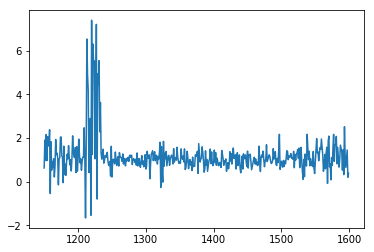

In [2]:
trainData = np.loadtxt(open("quasar_train.csv","rb"),delimiter=",",skiprows=0)
x=np.transpose(trainData[0,:])
y=np.transpose(trainData[1,:])
fig, ax = plt.subplots()
ax.plot(x,y)

绘制训练后的直线：

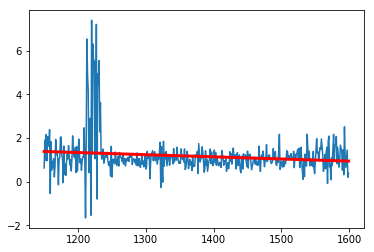

In [3]:
X=np.zeros((x.shape[0],2))
X[:,0]=1
X[:,1]=x
X=np.asmatrix(X)
Y=np.asmatrix(y.reshape(y.shape[0],1))
theta=np.linalg.inv(X.T*X)*X.T*Y
yline=X*theta
ax.plot(x,yline,color='red',linewidth=3)
fig

(ii).对于线性加权回归，先定义函数来计算权重矩阵W:

In [4]:
def computeWeight(x,xi,t):
    w=np.exp(-(x-xi)**2/(2*t**2))
    W=np.eye(x.shape[0])
    np.fill_diagonal(W,w)
    return W

测试一下函数值

In [21]:
k=np.array([[1],[1],[1]])
W=computeWeight(k,0,5)
print(W)

[[0.98019867 0.         0.        ]
 [0.         0.98019867 0.        ]
 [0.         0.         0.98019867]]


In [5]:
def computeY(y,t):
    yW=np.zeros(y.shape)
    for index,xi in enumerate(x):
        Wi=np.asmatrix(computeWeight(x,xi,t))
        theta=np.linalg.inv(X.T*Wi*X)*X.T*Wi*y
        yW[index]=X[index,:]*theta
    return yW
yW=computeY(Y,5)

画出所有计算出的y值

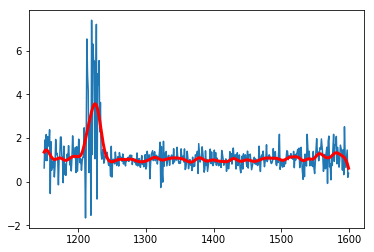

In [6]:
fig, ax = plt.subplots()
ax.plot(x,y)
ax.plot(x,yW,color='red',linewidth=3)

设定不同t值来计算线性加权回归

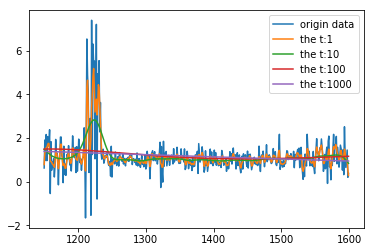

In [26]:
fig, ax = plt.subplots()
ax.plot(x,y,label='origin data')
for t in [1,10,100,1000]:
    yW=computeY(t)
    ax.plot(x,yW,label='the t:'+str(t))
ax.legend()

# (c)

In [12]:
Y=np.asmatrix(np.transpose(trainData[1:,:]))
smoothY=np.empty_like(Y)
for cindex in range(Y.shape[1]):
    smoothY[:,cindex]=computeY(Y[:,cindex],5)
print(smoothY)
testData = np.loadtxt(open("quasar_test.csv","rb"),delimiter=",",skiprows=0)
testY=np.asmatrix(np.transpose(testData[1:,:]))
smoothTestY=np.empty_like(testY)
for cindex in range(testY.shape[1]):
    smoothTestY[:,cindex]=computeY(testY[:,cindex],5)

(450, 200)
(450, 200)
[[ 1.35457751  0.8630299  -0.54199083 ...  0.84491185  0.2365519
   1.25215608]
 [ 1.411428    0.93499234 -0.3879195  ...  0.91335579  0.40504492
   1.21257714]
 [ 1.44418291  0.98748083 -0.23759803 ...  0.94612793  0.5759311
   1.15577569]
 ...
 [ 0.83468706  0.88094242  1.1474556  ...  0.96263275  1.06663278
   0.59479467]
 [ 0.73537353  0.7530859   1.18788252 ...  0.89165294  1.0357148
   0.37155891]
 [ 0.61880777  0.58686922  1.22661737 ...  0.80694689  0.99772697
   0.09915474]]


(ii)

In [120]:
#先将计算出的平滑之后的Y值分为fRight和fLeft两部分,同时X也分为两部分
rightIndex=np.where(X[:,[1]]>=1300)
XRight=X[rightIndex[0],:]
fRight=smoothY[allRight[0],:]
fTestRight=smoothTestY[allRight[0],:]
leftIndex=np.where(X[:,[1]]<1200)
XLeft=X[leftIndex[0],:]
fLeft=smoothY[leftIndex[0],:]
fTestLeft=smoothTestY[leftIndex[0],:]

In [127]:
#函数用于计算f函数的d值
def df(fi,fTrue):
    darray=np.power(np.subtract(fi,fTrue),2)
    return np.sum(darray,axis=0)
#对于ker函数定义
def ker(p):
    result=1-p
    if(result<0):
        result=0
    return result

ker = np.vectorize(ker)
#函数根据fTrainRight和fPredictRight选定权重函数，再根据fTrainLeft计算fPredictLeft
def fLeftPredict(fTrainRight,fPredictRight,fTrainLeft):
    dall=df(fTrainRight,fPredictRight)
    k=3#选取最近的3个fRight函数来计算fLeft
    h=dall[0,np.argmax(dall)]
    sort=np.argsort(dall,axis=None)
    sort=np.asarray(sort).flatten()
    sortk=sort[1:k+1]
    dk=dall[0,sortk]
    kerK=ker(dk/h)
    fLeftK=fTrainLeft[:,sortk]
    numeratorK=np.sum(np.multiply(kerK,fLeftK),axis=1)
    denominatorK=np.sum(kerK)
    fPredictLeft=numeratorK/denominatorK
    return fPredictLeft

#选择fRight的第j列数据作为，正确的f函数，计算出所有的d值
allError=0
for j in range(fRight.shape[1]):
    fRTrue=fRight[:,j]
    fLeftOut=fLeftPredict(fRight,fRTrue,fLeft)
    error=df(fLeft[:,j],fLeftOut)
    error=np.asarray(error).flatten()
    allError=allError+(error/fRight.shape[1])
print(allError)

[2.62192038]


(iii)对于测试集中的函数，可以采用上面相同的方式来计算fLeft的值。

error: [3.17028692]


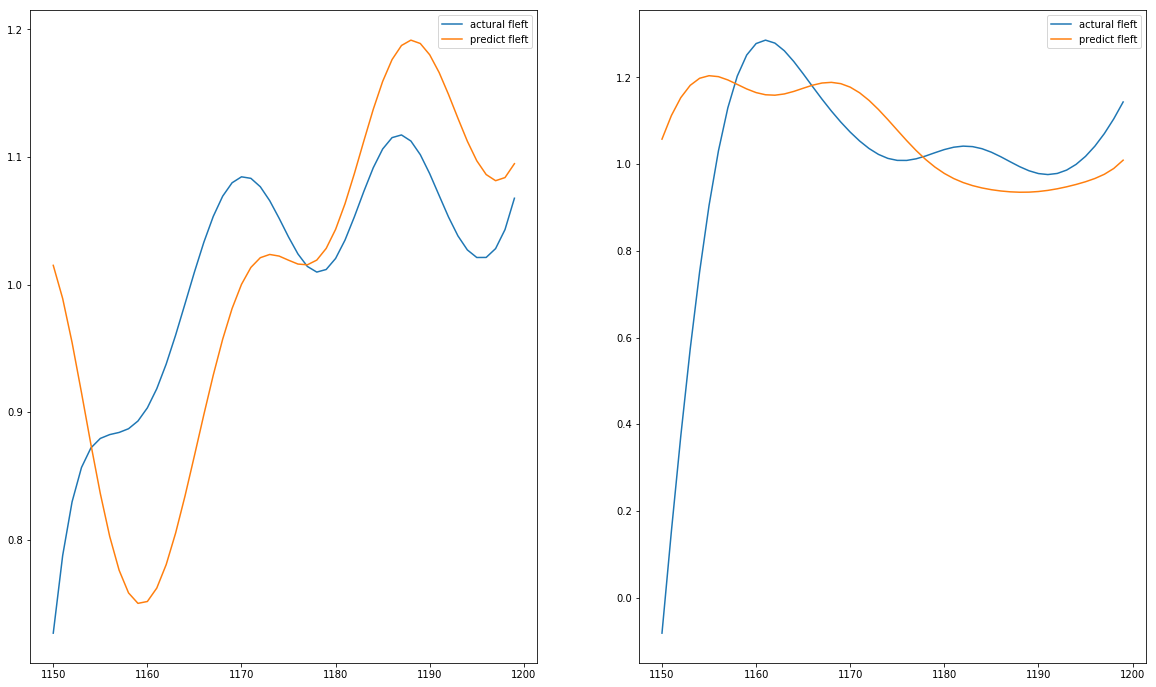

In [128]:
#对于测试集中的第1和第6行数据画图
fig, axes = plt.subplots(1, 2,figsize=(20, 12))
allError=0
for j in range(fTestRight.shape[1]):
    fRTrue=fTestRight[:,j]
    fLeftOut=fLeftPredict(fRight,fRTrue,fLeft)
    if j==0:
        axe=axes[0]
        axe.plot(XLeft[:,1],fTestLeft[:,j],label='actural fleft')
        axe.plot(XLeft[:,1],fLeftOut,label='predict fleft')
        axe.legend()
    if j==5:
        axe=axes[1]
        axe.plot(XLeft[:,1],fTestLeft[:,j],label='actural fleft')
        axe.plot(XLeft[:,1],fLeftOut,label='predict fleft')
        axe.legend()
    error=df(fTestLeft[:,j],fLeftOut)
    error=np.asarray(error).flatten()
    allError=allError+error
print("error:",allError/fTestRight.shape[1])